In [3]:
import boolean2 as bl
import matplotlib.pylab as pl
import numpy as np
from random import choice

In [4]:
import itertools

def getRule(act, inh):

    actLen = len(act)
    inhLen = len(inh)
        
    rules = []
    
    for case in itertools.product([0, 1], repeat=actLen + inhLen):
        actLevel = sum(case[0:actLen]) 
        inhLevel = sum(case[actLen:])
        if actLevel > 0 and actLevel >= inhLevel:
            rules.append(case)
    
    res = ""
    
    for rule in rules:                
        line = ""
            
        for idx, val in enumerate(act + inh):         
            if line != "":
                line += " and "
            
            if rule[idx] == 0:
                line += "not " + val
            else:
                line += "" + val
        
        if res != "":
            res += " or "
        
        res += line
            
    return res
    
# getRule(["WASP", "WAVE", "Cortactin"], ["Profilin", "Thymosin", "Coronin"])

In [5]:
def plotModel(data, title=""):
    x = []
    lab = []
    for key, value in sorted(data.iteritems()):    
        lab.append(key)
        x.append(value)

    pl.title(title.replace("\n", "; "))
    pl.imshow(x, interpolation='none');
    pl.yticks( np.arange(len(lab)), lab );
    pl.grid()

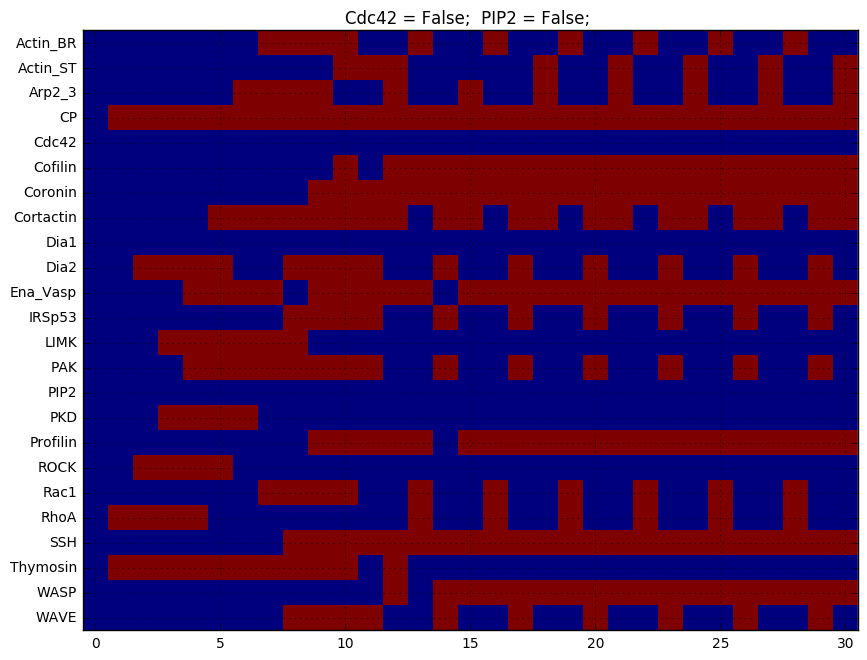

In [6]:
def initFunc(node):
        return False # choice([True, False])

   
rules = ""
rules += "1: WASP* = not Thymosin and (Rac1 or Cdc42 or PIP2 or Cortactin or IRSp53) \n"
rules += "1: WAVE* = Rac1 \n" # or IRSp53
rules += "1: Arp2_3* = PAK and (" + getRule(["WASP", "WAVE", "Cortactin"], ["Profilin", "Thymosin", "Coronin"]) + ")\n"
rules += "1: Rac1* = not ROCK and (Arp2_3 or Dia1) \n"
rules += "1: RhoA* = not Rac1 and not PAK \n"
rules += "1: Thymosin* = not WASP and not Cofilin \n" 
rules += "1: Cortactin* = (Rac1 and PAK) or ((Rac1 or PAK) and not (Coronin and PKD)) \n" # voting
rules += "1: IRSp53* = Cdc42 or Rac1 \n"
rules += "1: PAK* = Rac1 or Cdc42 or PKD \n"
rules += "1: Dia1* = RhoA and not CP \n"
rules += "1: Dia2* = Rac1 or RhoA \n"
rules += "1: Ena_Vasp* = IRSp53 or WASP or PKD \n"
rules += "1: Profilin* = " + getRule(["WASP", "Dia1", "WAVE"], ["Thymosin", "PIP2"]) + " \n"
rules += "1: CP* = (Arp2_3 and not Ena_Vasp) or not PIP2 \n"
rules += "1: Coronin* = SSH \n"
rules += "1: ROCK* = RhoA and not (SSH and Coronin) \n"
rules += "1: PKD* = ROCK \n"
rules += "1: LIMK* = (ROCK or PAK) and not SSH \n"
rules += "1: Cofilin* = " + getRule(["SSH", "Arp2_3"], ["PIP2", "Thymosin", "LIMK", "Cortactin"]) + "\n"
rules += "1: SSH* = (Coronin or Rac1) and not PKD \n"
rules += "1: Actin_BR* = (Arp2_3) \n" # or Cofilin) and not Thymosin 
rules += "1: Actin_ST* = Profilin and (" + getRule(["Dia1", "Dia2", "Ena_Vasp"], ["CP", "Cofilin"]) + ")\n"



   
init = "Cdc42 = False\n PIP2 = False\n"

model = bl.Model(init + rules, mode='sync')
model.initialize(missing=initFunc)
model.iterate(steps=30)

pl.figure(figsize=(10,8))

plotModel(model.data, init)


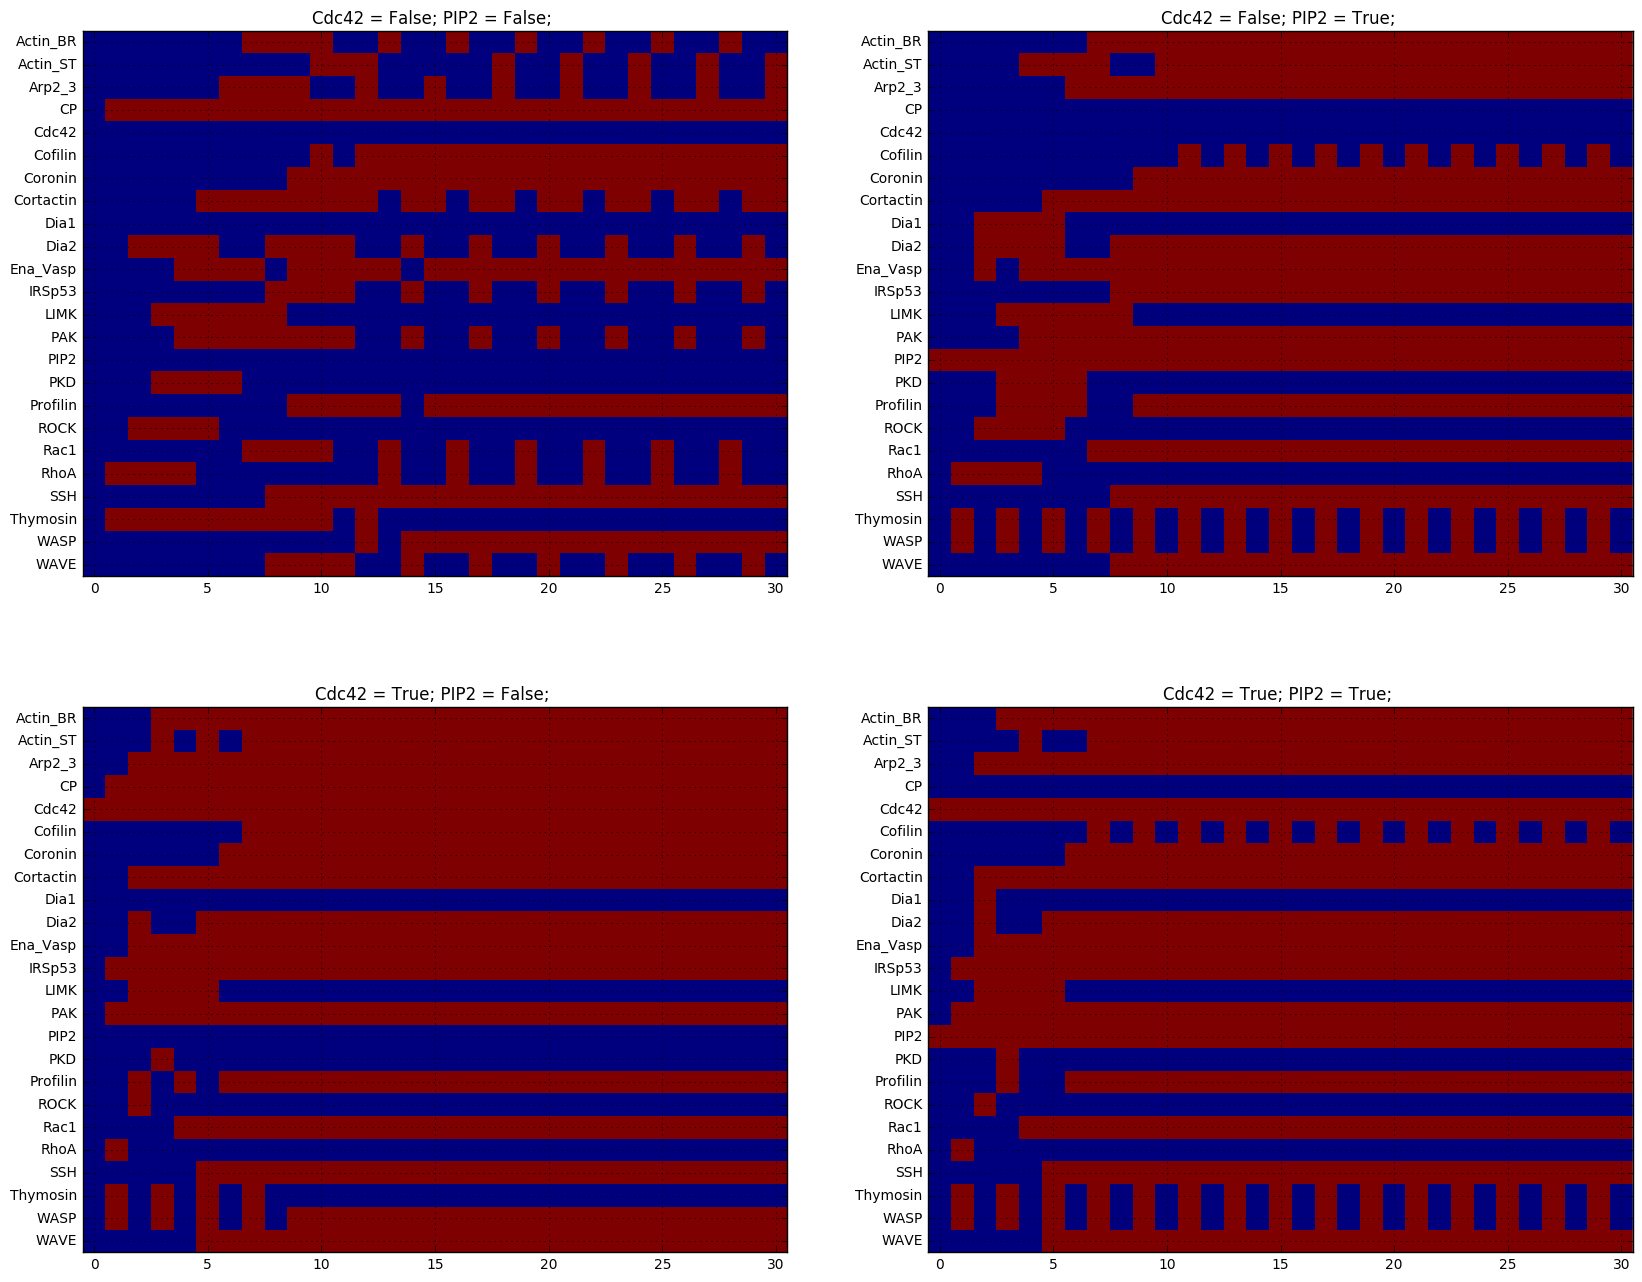

In [7]:
n=0
pl.figure(figsize=(20,16))

for Cdc42, PIP2 in [[False, False], [False, True], [True, False], [True, True]]:
    
    init = "Cdc42 = %s\nPIP2 = %s\n" % (Cdc42, PIP2)

    model = bl.Model(init + rules, mode='sync')
    model.initialize(missing=initFunc)
    model.iterate(steps=30)
    
    n+=1
    pl.subplot(2,2, n) 
    plotModel(model.data, init)
    

Cycle of length 2 starting at index 1


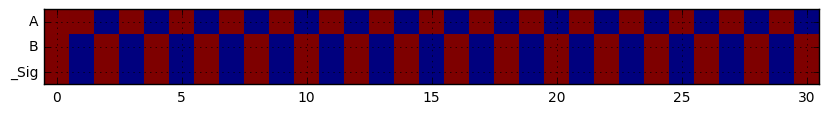

In [8]:
rules = ""
rules += "1: _Sig* = not _Sig \n"
rules += "1: A* = _Sig \n" 
rules += "1: B* = not _Sig \n" 
pl.figure(figsize=(10,8))
   
model = bl.Model(rules, mode='sync')
model.initialize(missing=bl.util.randbool)
model.iterate(steps=30)

plotModel(model.data)

model.report_cycles()

Cycle of length 3 starting at index 0


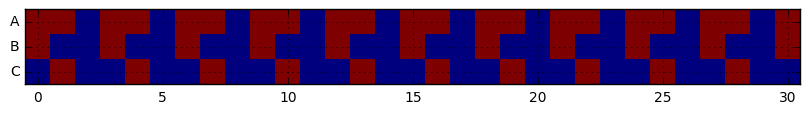

In [9]:
rules = ""
rules += "1: A* = not C \n"
rules += "1: B* = not A \n" 
rules += "1: C* = B \n" 
pl.figure(figsize=(10,8))
   
model = bl.Model(rules, mode='sync')
model.initialize(missing=bl.util.randbool)
model.iterate(steps=30)

plotModel(model.data)

model.report_cycles()

In [10]:
import tables
import pandas as pd

store = pd.HDFStore("../store.h5", mode='r')


store

# plotModel()

# plotModel(store['dfBool']['model'][2])

<class 'pandas.io.pytables.HDFStore'>
File path: ../store.h5
Empty